In [11]:
%matplotlib notebook

import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [12]:
df = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/robotPosition", sep=" ", header=0, names=["time", "xpos", "ypos", "hdg"])

In [13]:
df

,time,xpos,ypos,hdg
0,0.1,-2.4949,-2.4995,0.1944
1,0.2,-2.4900,-2.4980,0.3888
2,0.3,-2.4854,-2.4956,0.5833
3,0.4,-2.4814,-2.4924,0.7777
4,0.5,-2.4756,-2.4863,0.8497
...,...,...,...,...
5023,502.4,-2.5225,-2.4837,2.5157
5024,502.5,-2.5308,-2.4777,2.5180
5025,502.6,-2.5389,-2.4720,2.5339
5026,502.7,-2.5451,-2.4682,2.6486


<IPython.core.display.Javascript object>


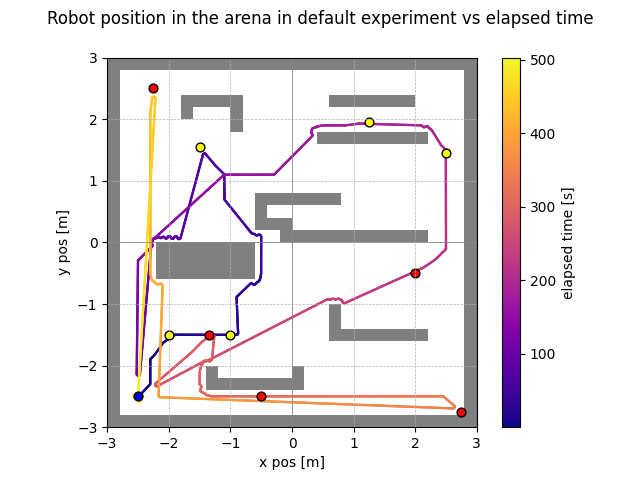

(-3.0, 3.0)

In [14]:
fig = plt.figure()
axes = fig.gca()

axes.set_xlim(-3, 3)
axes.set_ylim(-3, 3)

In [15]:
#axes.set_axisbelow(True)

plt.axline((0, 0), slope=0, c="grey", lw=0.5)
plt.axline((0, 0), (0,1), c="grey", lw=0.5)

fig.suptitle('Robot position in the arena in default experiment vs elapsed time')

axes.set_aspect('equal', adjustable='box')

In [16]:
df.plot(kind="scatter", ax=axes, x="xpos", y="ypos", c="time", cmap="plasma", s=0.5, colorbar=False)
plt.xlabel('x pos [m]')
plt.ylabel('y pos [m]')
plt.grid(linestyle='--', linewidth=0.5, which="major")
plt.grid(linestyle='-.', linewidth=0.25, which="minor")
cbar = plt.colorbar(axes.collections[0], ax=fig.gca())

In [17]:
# draw map walls
map_str =            "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%" \
                     "%############################%" \
                     "%############################%" \
                     "%#######%%%%%%%%#############%" \
                     "%#######%######%#############%" \
                     "%############################%" \
                     "%############################%" \
                     "%#################%%%%%%%%###%" \
                     "%#################%##########%" \
                     "%#################%##########%" \
                     "%############################%" \
                     "%############################%" \
                     "%###%%%%%%%%#################%"\
                     "%###%%%%%%%%#################%"\
                     "%###%%%%%%%%#################%"\
                     "%#############%%%%%%%%%%%%###%"\
                     "%###########%%%##############%"\
                     "%###########%################%"\
                     "%###########%%%%%%%##########%"\
                     "%############################%"\
                     "%############################%"\
                     "%############################%"\
                     "%############################%"\
                     "%################%%%%%%%%%###%"\
                     "%#########%##################%"\
                     "%#####%###%##################%"\
                     "%#####%%%%%#######%%%%%%%####%"\
                     "%############################%"\
                     "%############################%"\
                     "%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"

curx = -3
cury = -3
for x in range(30):
    for y in range(30):
        if map_str[x + y * 30] == "%":
            #print(curx, cury)
            rect = patches.Rectangle((curx, cury), 0.2, 0.2, linewidth=0, facecolor='grey', zorder=-1)
            axes.add_patch(rect)
        cury = cury + 0.2
    cury = -3
    curx = curx + 0.2

In [18]:
# plot drop points
dhigh = [(-2.0, -1.5), (-1.0, -1.5), (-1.5, 1.55), (1.25, 1.95), (2.5, 1.45)]
dlow = [(-0.5, -2.5), (-1.35, -1.5), (-2.25, 2.5), (2, -0.5), (2.75, -2.75)]
dstart = [(-2.5, -2.5)]

plt.scatter([i[0] for i in dhigh], [i[1] for i in dhigh], s=40, c="yellow", edgecolors="black");
plt.scatter([i[0] for i in dlow], [i[1] for i in dlow], s=40, c="red", edgecolors="black");
plt.scatter([i[0] for i in dstart], [i[1] for i in dstart], s=40, c="blue", edgecolors="black");

In [19]:
# add top and bottom labels to colorbar
ticks = list(cbar.get_ticks())
#cbar.set_ticks(list(df["time"].head(1)) + list(df["time"].tail(1)) + ticks)
cbar.set_label("elapsed time [s]")

In [10]:
fig.savefig("pos_time.pdf", bbox_inches='tight')

# w/ respect to status

<IPython.core.display.Javascript object>


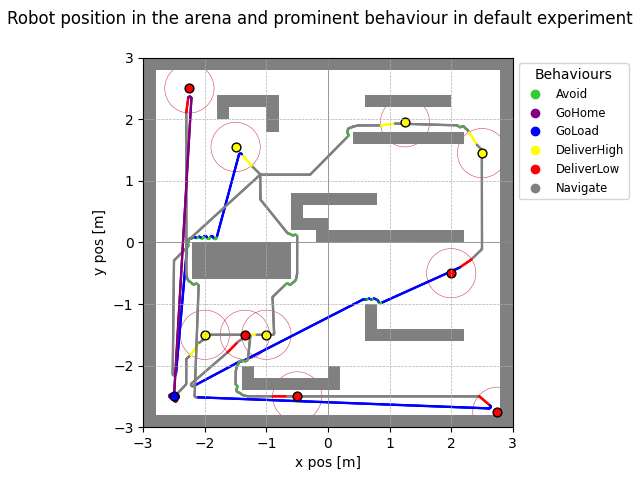

In [23]:
fig = plt.figure()
axes = fig.gca()

axes.set_xlim(-3, 3)
axes.set_ylim(-3, 3)

#axes.set_axisbelow(True)

plt.axline((0, 0), slope=0, c="grey", lw=0.5)
plt.axline((0, 0), (0,1), c="grey", lw=0.5)

fig.suptitle('Robot position in the arena and prominent behaviour in default experiment')

axes.set_aspect('equal', adjustable='box')

In [27]:
dfb = pd.read_csv("/home/marcos/OneDrive/home/ETSIT/tercero/irin/o1/dev/irsim2021/outputFiles/behaviorOutput", sep=" ", header=0, names=["time", "beh"])
dfb = dfb.drop(columns=["time"])
dfb = df.copy().join(dfb)
dfb

,time,xpos,ypos,hdg,beh
0,0.1,-2.4949,-2.4995,0.1944,5
1,0.2,-2.4900,-2.4980,0.3888,5
2,0.3,-2.4854,-2.4956,0.5833,5
3,0.4,-2.4814,-2.4924,0.7777,5
4,0.5,-2.4756,-2.4863,0.8497,5
...,...,...,...,...,...
5023,502.4,-2.5225,-2.4837,2.5157,1
5024,502.5,-2.5308,-2.4777,2.5180,1
5025,502.6,-2.5389,-2.4720,2.5339,1
5026,502.7,-2.5451,-2.4682,2.6486,1


In [28]:
scatter = dfb.plot.scatter(ax=axes, x="xpos", y="ypos", c="beh", cmap=mpl.colors.ListedColormap(["limegreen", "purple", "blue", "yellow", "red", "gray"]), s=0.5, colorbar=False, label="beh")
plt.xlabel('x pos [m]')
plt.ylabel('y pos [m]')
plt.grid(linestyle='--', linewidth=0.5, which="major")
plt.grid(linestyle='-.', linewidth=0.25, which="minor")
ld = axes.legend(scatter.collections[0].legend_elements()[0], ["Avoid", "GoHome", "GoLoad", "DeliverHigh", "DeliverLow", "Navigate", "GoGoal"],
                    loc="upper left", bbox_to_anchor=(1,1), title="Behaviours", fontsize="small")

In [29]:
scatter.collections[0].legend_elements()

([<matplotlib.lines.Line2D at 0x7f3521d8d1c0>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{1}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{3}$',
  '$\\mathdefault{4}$',
  '$\\mathdefault{5}$'])

In [30]:
# plot drop points
dhigh = [(-2.0, -1.5), (-1.0, -1.5), (-1.5, 1.55), (1.25, 1.95), (2.5, 1.45)]
dlow = [(-0.5, -2.5), (-1.35, -1.5), (-2.25, 2.5), (2, -0.5), (2.75, -2.75)]
dstart = [(-2.5, -2.5)]

plt.scatter([i[0] for i in dhigh], [i[1] for i in dhigh], s=40, c="yellow", edgecolors="black");
plt.scatter([i[0] for i in dlow], [i[1] for i in dlow], s=40, c="red", edgecolors="black");
plt.scatter([i[0] for i in dstart], [i[1] for i in dstart], s=40, c="blue", edgecolors="black");

# draw influence radius
for i in dhigh + dlow:
    c = patches.Circle((i[0], i[1]), 0.4, edgecolor='xkcd:dark pink', lw=0.4, facecolor="none", zorder=-2)
    axes.add_patch(c)

In [31]:
# draw map walls
curx = -3
cury = -3
for x in range(30):
    for y in range(30):
        if map_str[x + y * 30] == "%":
            #print(curx, cury)
            rect = patches.Rectangle((curx, cury), 0.2, 0.2, linewidth=0, facecolor='grey', zorder=-1)
            axes.add_patch(rect)
        cury = cury + 0.2
    cury = -3
    curx = curx + 0.2

In [17]:
fig.savefig("pos_beh.pdf", bbox_inches='tight')

# Pathplanning variations

<IPython.core.display.Javascript object>


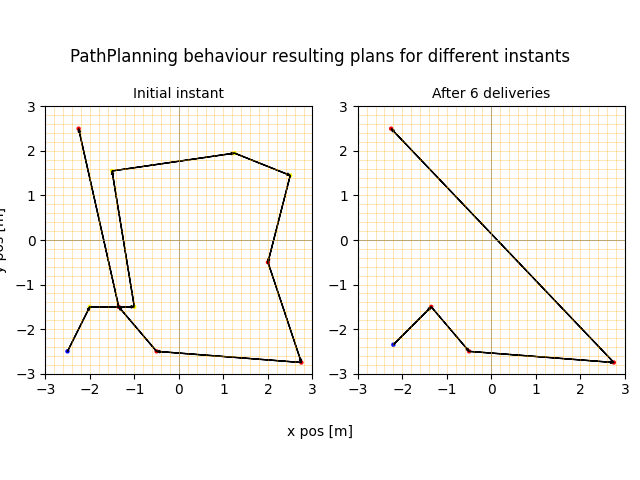

In [32]:
fig, axx = plt.subplots(1, 2)
axes = axx[0]

axes.set_xlim(-3, 3)
axes.set_ylim(-3, 3)

#axes.set_axisbelow(True)

axes.axline((0, 0), slope=0, c="grey", lw=0.5)
axes.axline((0, 0), (0,1), c="grey", lw=0.5)

axes.set_aspect('equal', adjustable='box')

In [33]:
for x in np.arange(-3, 3, step=0.2):
    axes.axvline(x=x, linewidth=0.4, color='orange', alpha=0.5)
    axes.axhline(y=x, linewidth=0.4, color='orange', alpha=0.5)
    
axes.set_title("Initial instant", fontsize="medium")

Text(0.5, 1.0, 'Initial instant')

In [34]:
# plot drop points
dhigh = [(-2.0, -1.5), (-1.0, -1.5), (-1.5, 1.55), (1.25, 1.95), (2.5, 1.45)]
dlow = [(2, -0.5), (2.75, -2.75), (-0.5, -2.5), (-1.35, -1.5), (-2.25, 2.5)]
dstart = [(-2.5, -2.5)]

axes.scatter([i[0] for i in dhigh], [i[1] for i in dhigh], s=10, c="yellow", edgecolors="none");
axes.scatter([i[0] for i in dlow], [i[1] for i in dlow], s=10, c="red", edgecolors="none");
axes.scatter([i[0] for i in dstart], [i[1] for i in dstart], s=10, c="blue", edgecolors="none");

In [35]:
conc = dstart + dhigh + dlow 
for i in range(1, len(conc)):
    axes.arrow(conc[i-1][0], conc[i-1][1], conc[i][0] - conc[i-1][0], conc[i][1] - conc[i-1][1], head_width=0.05, length_includes_head=True, fc="k", width=0.00001)

In [36]:
axes = axx[1]

axes.set_xlim(-3, 3)
axes.set_ylim(-3, 3)

axes.axline((0, 0), slope=0, c="grey", lw=0.5)
axes.axline((0, 0), (0,1), c="grey", lw=0.5)

axes.set_aspect('equal', adjustable='box')

In [37]:
for x in np.arange(-3, 3, step=0.2):
    axes.axvline(x=x, linewidth=0.4, color='orange', alpha=0.5)
    axes.axhline(y=x, linewidth=0.4, color='orange', alpha=0.5)
axes.set_title("After 6 deliveries", fontsize="medium")

Text(0.5, 1.0, 'After 6 deliveries')

In [38]:
# plot drop points
dhigh = []
dlow = [ (-1.35, -1.5), (-0.5, -2.5), (2.75, -2.75),(-2.25, 2.5)]
dstart = [(-2.2, -2.35)]

axes.scatter([i[0] for i in dhigh], [i[1] for i in dhigh], s=10, c="yellow", edgecolors="none");
axes.scatter([i[0] for i in dlow], [i[1] for i in dlow], s=10, c="red", edgecolors="none");
axes.scatter([i[0] for i in dstart], [i[1] for i in dstart], s=10, c="blue", edgecolors="none");

In [39]:
conc = dstart + dhigh + dlow 
for i in range(1, len(conc)):
    axes.arrow(conc[i-1][0], conc[i-1][1], conc[i][0] - conc[i-1][0], conc[i][1] - conc[i-1][1], head_width=0.05, length_includes_head=True, fc="k", width=0.00001)

In [40]:
fig.tight_layout()
fig.text(0.5,0.1005, "x pos [m]", ha="center", va="center")
fig.text(0,0.5, "y pos [m]", ha="center", va="center", rotation=90)
fig.suptitle('PathPlanning behaviour resulting plans for different instants', y=0.9)

Text(0.5, 0.9, 'PathPlanning behaviour resulting plans for different instants')

In [27]:
fig.savefig("pathplan.pdf", bbox_inches='tight')